# Descubra as melhores notas de matemática do ENEM 2016

Você deverá criar um modelo para prever a nota da prova de matemática de quem participou do ENEM 2016. Para isso, usará Python, Pandas, Sklearn e Regression.

No arquivo **test.csv** crie um modelo para prever nota da prova de matemática (coluna NU_NOTA_MT) de quem participou do ENEM 2016.

Salve sua resposta em um arquivo chamado **answer.csv** com duas colunas: NU_INSCRICAO e NU_NOTA_MT.

In [1]:
# importando bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
# utiliza estilo seaborn
sns.set()

from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

## Pré-Processamento

In [2]:
# carregamento dos dados
df_treino = pd.read_csv('train.csv')
df_teste = pd.read_csv('test.csv')

colunas = ['NU_INSCRICAO','NU_IDADE','TP_SEXO', 'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DISLEXIA',
           'IN_DISCALCULIA', 'IN_GESTANTE', 'IN_IDOSO', 'NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC',
           'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5']

df_treino_mod = df_treino[colunas + ['NU_NOTA_MT']]
df_teste_mod = df_teste[colunas]
df_treino_mod.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_MT
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,M,0,0,0,0,0,0,0,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,399.4
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,F,0,0,0,0,0,0,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,459.8
2,f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,21,F,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,25,F,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,28,M,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Verifica Missing Values

In [3]:
df_treino_mod.isna().sum()

NU_INSCRICAO         0
NU_IDADE             0
TP_SEXO              0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_GESTANTE          0
IN_IDOSO             0
NU_NOTA_CN        3389
NU_NOTA_CH        3389
NU_NOTA_LC        3597
NU_NOTA_COMP1     3597
NU_NOTA_COMP2     3597
NU_NOTA_COMP3     3597
NU_NOTA_COMP4     3597
NU_NOTA_COMP5     3597
NU_NOTA_MT        3597
dtype: int64

In [4]:
# remove linhas com valores NaN de NU_NOTA_MT
df_treino_mod = df_treino_mod.dropna(subset=['NU_NOTA_MT'])
# trata valores nulos do conjunto de treino com zero
df_treino_mod = df_treino_mod.replace(np.nan, 0)

df_treino_mod.isna().sum()

NU_INSCRICAO      0
NU_IDADE          0
TP_SEXO           0
IN_BAIXA_VISAO    0
IN_CEGUEIRA       0
IN_SURDEZ         0
IN_DISLEXIA       0
IN_DISCALCULIA    0
IN_GESTANTE       0
IN_IDOSO          0
NU_NOTA_CN        0
NU_NOTA_CH        0
NU_NOTA_LC        0
NU_NOTA_COMP1     0
NU_NOTA_COMP2     0
NU_NOTA_COMP3     0
NU_NOTA_COMP4     0
NU_NOTA_COMP5     0
NU_NOTA_MT        0
dtype: int64

In [5]:
df_teste_mod.isna().sum()

NU_INSCRICAO         0
NU_IDADE             0
TP_SEXO              0
IN_BAIXA_VISAO       0
IN_CEGUEIRA          0
IN_SURDEZ            0
IN_DISLEXIA          0
IN_DISCALCULIA       0
IN_GESTANTE          0
IN_IDOSO             0
NU_NOTA_CN        1134
NU_NOTA_CH        1134
NU_NOTA_LC        1199
NU_NOTA_COMP1     1199
NU_NOTA_COMP2     1199
NU_NOTA_COMP3     1199
NU_NOTA_COMP4     1199
NU_NOTA_COMP5     1199
dtype: int64

In [6]:
# trata valores nulos do conjunto de teste 
df_teste_mod = df_teste_mod.replace(np.nan, 0)

In [7]:
df_teste_mod.isna().sum()

NU_INSCRICAO      0
NU_IDADE          0
TP_SEXO           0
IN_BAIXA_VISAO    0
IN_CEGUEIRA       0
IN_SURDEZ         0
IN_DISLEXIA       0
IN_DISCALCULIA    0
IN_GESTANTE       0
IN_IDOSO          0
NU_NOTA_CN        0
NU_NOTA_CH        0
NU_NOTA_LC        0
NU_NOTA_COMP1     0
NU_NOTA_COMP2     0
NU_NOTA_COMP3     0
NU_NOTA_COMP4     0
NU_NOTA_COMP5     0
dtype: int64

### Feature Engineering

In [8]:
def trata_colunas(x):
    # cria coluna IN_DEFICIENTE
    soma_def = x['IN_BAIXA_VISAO'] + x['IN_CEGUEIRA'] + x['IN_SURDEZ'] + x['IN_CEGUEIRA'] + x['IN_DISLEXIA']
    if soma_def > 0:
        x['IN_DEFICIENTE'] = 1
    else:
        x['IN_DEFICIENTE'] = 0 
    
    # converte TP_SEXO para numérico M=>0 e F=>1
    x['TP_SEXO'] = 1 if x['TP_SEXO'] == 'F' else 0
    return x



df_treino_mod = df_treino_mod.apply(trata_colunas,axis=1)
df_treino_mod.drop(columns=['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DISLEXIA'],axis=1,inplace=True)  
df_treino_mod.reset_index(inplace=True, drop=True)

df_teste_mod = df_teste_mod.apply(trata_colunas,axis=1)
df_teste_mod.drop(columns=['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ','IN_DISLEXIA'],axis=1,inplace=True) 
df_teste_mod.reset_index(inplace=True,drop=True)

df_treino_mod.head()

,NU_INSCRICAO,NU_IDADE,TP_SEXO,IN_DISCALCULIA,IN_GESTANTE,IN_IDOSO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_MT,IN_DEFICIENTE
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,24,0,0,0,0,436.3,495.4,581.2,120.0,120.0,120.0,80.0,80.0,399.4,0
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,17,1,0,0,0,474.5,544.1,599.0,140.0,120.0,120.0,120.0,80.0,459.8,0
2,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,18,1,0,0,0,439.7,583.2,410.9,120.0,120.0,120.0,160.0,100.0,364.5,0
3,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,18,1,0,0,0,420.1,604.2,484.5,100.0,120.0,120.0,120.0,100.0,529.2,0
4,2eb189d4912f64b19d1967e8e84b6141aba18770,18,1,0,0,0,619.6,625.8,611.2,140.0,120.0,120.0,120.0,120.0,566.7,0


In [9]:
df_treino_mod.shape

(10133, 16)

### Análise de Correlação

Na imagem abaixo é possível verificar a correlação entre NU_NOTA_MT e os outros atributos numéricos. Nota-se que apenas alguns atributos possuem correlação forte com NU_NOTA_MT:

- NU_NOTA_CN;
- NU_NOTA_CH;
- NU_NOTA_LC;
- NU_NOTA_COMP1 até NU_NOTA_COMP5;
- TP_SEXO.


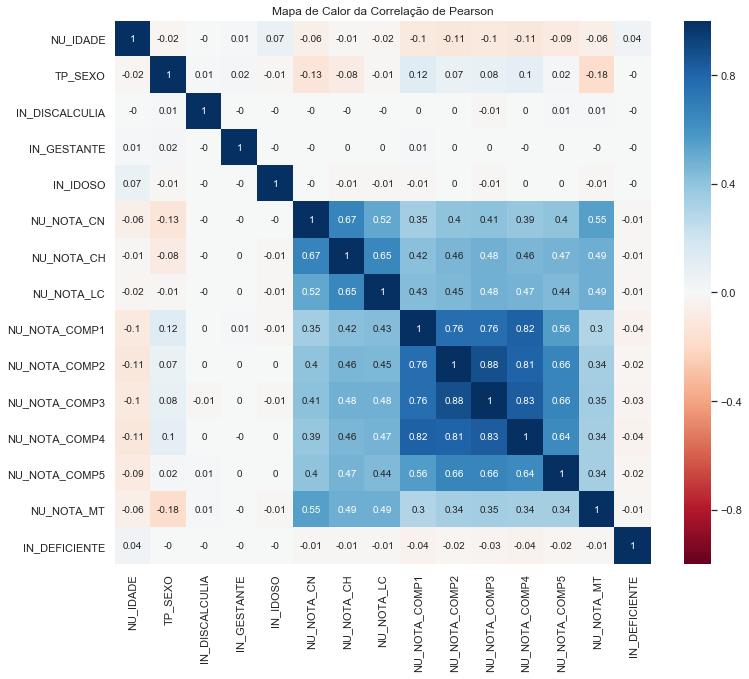

In [10]:
plt.figure(figsize=(12,10))
sns.heatmap(df_treino_mod.corr().round(2),
            vmin=-1,
            vmax=1,
            cmap='RdBu',
            annot=True)
plt.title("Mapa de Calor da Correlação de Pearson")
plt.show()

### Padronização dos Dados

In [11]:
# remove o target do dataframe antes de aplicar o scaler 
Y = df_treino_mod['NU_NOTA_MT']

X_treino = df_treino_mod[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC',
                  'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','TP_SEXO']]


X_teste = df_teste_mod[['NU_NOTA_CN', 'NU_NOTA_CH','NU_NOTA_LC',
                  'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','TP_SEXO']]

In [12]:
# cria o scaler e aplica nos dados de treinamento
scaler = StandardScaler()
scaler.fit(X_treino)
X_treino_esc = scaler.transform(X_treino)
# converte dos os dados de teste com o scaler
X_teste_esc = scaler.transform(X_teste)

## Treinamento de Modelos
### Regressão Linear

In [13]:
reg = linear_model.LinearRegression()
reg.fit(X_treino_esc,Y)
Y_pred_treino_1 = reg.predict(X_treino_esc)
print("R2 Score (Coef. de Determinação):" + str(r2_score(Y, Y_pred_treino_1)))
print('MAE (erro absoluto médio):',str(metrics.mean_absolute_error(Y, Y_pred_treino_1)))
print('MSE (erro quadrático médio):',str(metrics.mean_squared_error(Y, Y_pred_treino_1)))
print('RMSE:',str(np.sqrt(metrics.mean_squared_error(Y, Y_pred_treino_1))))

R2 Score (Coef. de Determinação):0.38944412903979087
MAE (erro absoluto médio): 61.38121761072949
MSE (erro quadrático médio): 6083.768814516785
RMSE: 77.9985180276958


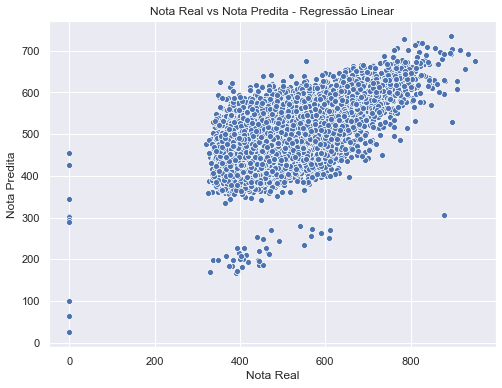

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(Y, Y_pred_treino_1)
plt.title('Nota Real vs Nota Predita - Regressão Linear')
plt.xlabel("Nota Real")
plt.ylabel("Nota Predita")
plt.show()

### Randon Forest Regression

In [15]:
model_rf = RandomForestRegressor()
model_rf.fit(X_treino_esc, Y)
Y_pred_treino_2 = model_rf.predict(X_treino_esc)

Y_pred_teste = model_rf.predict(X_teste_esc)

print('MAE (erro absoluto médio):',str(metrics.mean_absolute_error(Y, Y_pred_treino_2)))
print('MSE (erro quadrático médio):',str(metrics.mean_squared_error(Y, Y_pred_treino_2)))
print('RMSE:',str(np.sqrt(metrics.mean_squared_error(Y, Y_pred_treino_2))))

MAE (erro absoluto médio): 22.35689983223133
MSE (erro quadrático médio): 820.3220967482488
RMSE: 28.64126562755649


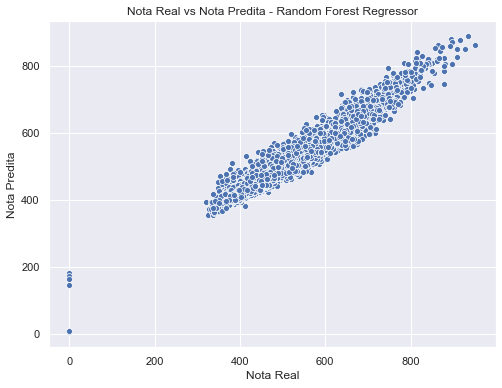

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(Y,Y_pred_treino_2)
plt.title('Nota Real vs Nota Predita - Random Forest Regressor')
plt.xlabel("Nota Real")
plt.ylabel("Nota Predita")
plt.show()

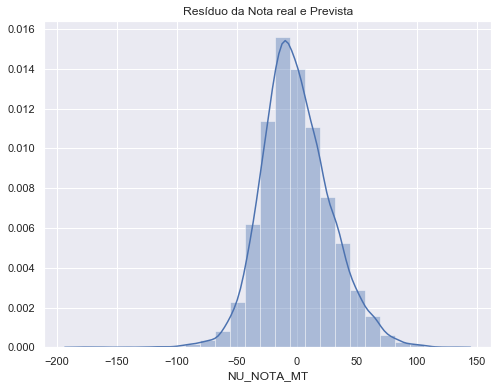

In [18]:
# resíduos
plt.figure(figsize=(8,6))
sns.distplot((Y-Y_pred_treino_2),bins=25)
plt.title('Resíduo da Nota real e Prevista')
plt.show()

### Gerando Dados de Saída

In [19]:
answer = pd.DataFrame({'NU_INSCRICAO':df_teste_mod['NU_INSCRICAO'], 'NU_NOTA_MT':Y_pred_teste})

In [20]:
answer.head()

,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,404.747
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,442.073
2,b38a03232f43b11c9d0788abaf060f7366053b6d,579.277
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,4.984
4,715494628a50142ce8cb17191cfe6d0f3cae0934,515.994


In [21]:
answer.to_csv('answer.csv',index=False)